# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

### Response

15 Elixirs. 0.15 multiplied by 100.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

### Response

Each loot box has a determined probability of success (ie. getting a loot box). To find out how many loot boxes someone has to purchase to get an elixir, we will need to run simulations on a large sample size, like 10000 to 1000000. Intuitively, I will not be able to estimate this. Allow me to run a simulation for you.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

### Response

Binomial distribution with two bernoulli trials where the outcomes are 'exilir' and 'empty'. We let 'empty' be a failed bernoulli trial while 'elixir' is 'success'

Probability of success is P(getting an elixir)

and number of trials is 100

The discrete random variable can be modelled by the Binomial Random variable

X ~ B(100, P(elixir))

To find out what the probability of getting more than 20 elixirs is, we need to calculate P(X > 20). 

I am assuming from the phrasing that the inequality is exclusive of 20.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

### Response

It is discrete because the outcomes are positive integers and hence the sample space is countable.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

### Response

The Binomial Distribution is best suited for this.

X ~ B(100, P(elixir))

1. There is a fixed number of Bernoulli trials (with either success "elixir" or failure "no elixir")

2. the trials are all independent of each other

3. There is a success event and a failure event (as mentioned in point 1)

4. The probability of success is defined and fixed as 0.15 (hence the probability of failure is also fixed)


#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [1]:
list(range(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [4]:
# Show your work; leave your answer in a comment.
import scipy.stats 
from scipy.stats import binom

n = 100
p = 0.15
cumulative = 0
for k in range(0,21):
    cumulative += binom.pmf(k, n, p)  # calculate probability from 0 to 20 elixirs

result = 1 - cumulative # calculate the complement
result


0.06631976581888199

### Response to 3c

Probability that user gets more than 20 elixirs out of 100 loot boxes is 

0.0663197

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [5]:
# Show your work; leave your answer in a comment.
import scipy.stats 
from scipy.stats import binom

n = 100
p = 0.15
k = 20
# we want to find P(X > 20)
result = 1 - binom.cdf(k, n, p)  # binom cdf gives probability of having k successes or less out of n trials
# https://www.google.com/search?q=python+binomial+distribution+calculate+probability&sxsrf=ALiCzsZEOXnHkqh97RD7BhylO_P4cCMqVg%3A1661868672101&ei=gBoOY8HkBfS13LUPvJqh-AE&ved=0ahUKEwjBpPSe3-75AhX0GrcAHTxNCB8Q4dUDCA4&uact=5&oq=python+binomial+distribution+calculate+probability&gs_lcp=Cgdnd3Mtd2l6EAMyBQghEKABMggIIRAeEBYQHToHCAAQRxCwAzoHCAAQsAMQQzoFCAAQgAQ6BggAEB4QFjoICAAQHhAPEBY6BQgAEIYDOggIABAeEAgQDToHCCEQoAEQCkoECEEYAEoECEYYAFCFBFjCJGCNJmgCcAF4AIABgwGIAbQNkgEEMjEuMpgBAKABAcgBCsABAQ&sclient=gws-wiz#kpvalbx=_7hoOY6ycGrWK3LUPz8WfwAk_19
result 

0.06631976581888166

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

<BarContainer object of 21 artists>

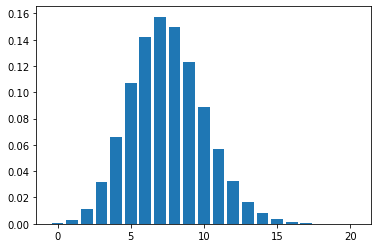

In [9]:
p_elixir = .15
n_elixir = 50

coin_distn = stats.binom(n_elixir, p_elixir)

possible_outcomes = list(range(0, 21)) # 0 to 50

plt.bar(possible_outcomes,
        coin_distn.pmf(possible_outcomes)) # this plots the pmf for each item in the list from 0 to 50

### Response to 3d

Probability that user gets more than 20 elixirs out of 100 loot boxes is 

0.066319 (same as 3c)

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

### Response to 3e

"Chance" is another word for "probability"

I'll use an example to explain the probability being 0.066319

If I have 100 players and each of these 100 players earned 100 loot boxes,

then it is likely that around 6 to 7 of these players will get more than 20 elixirs.

If I have 1000000 players and each of these 1000000 earned 100 loot boxes,

then it is likely that around 66319 of these players will get more than 20 elixirs.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

### Response to 4a

Poisson Distribution

1. The time interval is fixed as last month

2. The rate of purchase of loot boxes is constant 

3. Events/trials are independent

4. The rates of successes are non-negative integers

5. As the number of loot boxes increases, the probability of success decreases.

Counting up how many loot boxes each person purchased through the game is best measured as the mean. Hence the distribution has a mean/rate.

X - Pois (mean)

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [5]:
# Show your work; leave your answer in a comment.
# X  ~ Pois (2.7)
# Each loot box is $1

x= 500000/2.7
people = round(x,-3)

print(f"We will need at least {people} users to earn $500,000 in revenue.")


We will need at least 185000.0 users to earn $500,000 in revenue.


#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

### CHECK THIS QUESTION AGAIN ###

In [2]:
# Show your work; leave your answer in a comment.
# I am guessing from the word "Expect" that you are looking for the statistical expectation E(X)

from scipy.stats import poisson

result = 1 - poisson.cdf(5,2.7) # is use 5 because I must find out 5 or more (inclusive of 5). So i only minus <=5. 
# This works because poisson is continuous.

result # the result is the probability of getting a high value user

# this is the probability of someone purchasing 5 or more loot boxes
# https://www.statology.org/poisson-distribution-python/ 

0.0567316663016012

In [6]:
# E(X) = P(X) * X

expectation = result*5*people # need to multiply by "people" as I am calculating the probable number of people out of the min group that purchased more than 5 loot boxes

expectation = round(expectation, 2)

print(f"${expectation}")

$52476.79


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

In [10]:
poisson.pmf(1,2.7) # probability that a person purchased 1 loot box given that the mean is 2.7. Use pmf

0.18145488439732435

In [11]:
poisson.pmf(2,2.7)

0.24496409393638785

In [12]:
poisson.pmf(3,2.7)

0.22046768454274915

In [13]:
poisson.pmf(4,2.7)

0.14881568706635565

### Response

Out of a group of 100 people

Approximately
1. 18 people would purchase 1 loot box
2. 24 people would purchase 2 loot boxes
3. 22 people would purchase 3 loot boxes
4. 14 people would purchase 4 loot boxes

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [16]:
import numpy as np
import scipy.stats
from scipy.stats import binom

In [18]:
# start by coding an elixir trial
p_elixir = 0.15 # based on version 1, an elixir occurs 15% of the time
loot_box = np.random.choice(['elixir', 'empty'], p=[p_elixir, 1-p_elixir])

loot_box


'empty'

In [19]:
# This code doesn't work. The next one does.
def first_elixir(n, p_elixir = 0.15): # for this function, run it 100,000 times.Hence, n = 100,000.
    first_prize = []
    for i in range(n): # simulate n trials
        count = 0
        # loot_box
        while np.random.choice(['elixir', 'empty'], p=[p_elixir, 1-p_elixir]) == 'empty': # while no elixir, keep opening loot box
            count += 1
        
        first_prize.append(count)
            
    return first_prize

        #refer to problem 7

In [20]:
def first_elixir2(n, p_elixir = 0.15): # for this function, run it 100,000 times.Hence, n = 100,000.
    first_prize = []
    count = 1 # by default, we will open at least one box
    for i in range(n):
        while True: # will continue until we break
            loot_box = np.random.choice(['elixir', 'empty'], p=[p_elixir, 1-p_elixir]) # simulate one loot box opening
            if loot_box == 'empty':
                count += 1
            else:
                first_prize.append(count)
                break
    return first_prize 
    # refer to problem 11

In [21]:
first_elixir2(10, 0.15)

[7, 11, 11, 11, 11, 34, 48, 57, 68, 68]

In [22]:
array = first_elixir2(100000, 0.15)

np.percentile(array, 5)

# 5, 25, 50, 75, 95

27900.700000000004

In [33]:
array = first_elixir2(100000, 0.15)

np.percentile(array, 15)

86572.79999999999

In [23]:
for i in [5, 25,50, 75, 95]:
    percentile_ = np.percentile(array, i)
    print (f"The {i}th percentile is {percentile_}")

The 5th percentile is 27900.700000000004
The 25th percentile is 141995.5
The 50th percentile is 283283.0
The 75th percentile is 425349.5
The 95th percentile is 539405.05


### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

### Response

I can use a dictionary to store this

Example

Version_2 = {elixir: 100000, pendant: 10, steel: 3, bronze: 4}

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

### Response

From the perspective of my boss, the idea of "better" means greater profitability for the company.

The assumption is that a player might stop buying loot boxes once they win something.

I will measure the expectation of both versions using assuming that players will stop buying once they win something.

The model with the highest expectation is what I would recommend to my boss as it raises profitability.

